# Hamming distance analysis of bit libraries

Jupyter notebook containing analysis to visualize hamming distance of bit-based barcoding system.

Input for this notebook requires:
1) A .csv file with the three sets of 500 possible bit options (from Shin & Urbanek et al., Supplementary Table 1)
2) Calculated % of non-mapping, single mapping, and multi-mapping bits from each of the bit-based viral diversity libraries

Output for this notebook includes:
1) Histograms showing hamming distance for each bit x bit combination
2) Bar plot showing percentage of bits from diversity libraries that either don't map, map to a single bit, or are multi-mapping

Module and their versions used when generating figures for the paper can be found in 'requirements.txt', which is stored in our GitHub repository: https://github.com/MEUrbanek/rabies_barcode_tech

This code was last amended by Maddie Urbanek on 12/12/2025

## Notebook set-up

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#Set working directory to point to barcode diversity STICR sequence table
import os
os.chdir('/Users/maddieurbanek/Desktop/revision_data/resubmission/data/barcode_diversity_libraries/')

## Load in and format data

In [5]:
#Read in STICR bit table and rename columns
delgado = pd.read_table("./sticr_500_sequence_table.csv",delimiter=',')
delgado.columns=['bit1','bit1r','bit2','bit2r','bit3','bit3r']

,bit1,bit1r,bit2,bit2r,bit3,bit3r
0,AATTCCATAGGGGCACAGCCG,GATCCGGCTGTGCCCCTATGG,GATCCTGCCAGAACCGAGGG,CTAGCCCTCGGTTCTGGCAG,CTAGCGCCAGTTCTTTGCCC,TCGAGGGCAAAGAACTGGCG
1,>Fragment1_F_002,>Fragment1_R_002,>Fragment2_F_002,>Fragment2_R_002,>Fragment3_F_002,>Fragment3_R_002
2,AATTCCGATTCACATAGGGGG,GATCCCCCCTATGTGAATCGG,GATCGCCAAAGTGGGCGTGG,CTAGCCACGCCCACTTTGGC,CTAGGTACTTGCCTGGCCTC,TCGAGAGGCCAGGCAAGTAC
3,>Fragment1_F_003,>Fragment1_R_003,>Fragment2_F_003,>Fragment2_R_003,>Fragment3_F_003,>Fragment3_R_003
4,AATTCGCAACAATGCGCTGTG,GATCCACAGCGCATTGTTGCG,GATCGATGACAGCACGTCGG,CTAGCCGACGTGCTGTCATC,CTAGCATTCGGCATTCCGAC,TCGAGTCGGAATGCCGAATG
...,...,...,...,...,...,...
994,AATTCCTACCCGCGCAGGACG,GATCCGTCCTGCGCGGGTAGG,GATCATGTGAGCTGCGAGAG,CTAGCTCTCGCAGCTCACAT,CTAGTAACGGACGGGTTGTC,TCGAGACAACCCGTCCGTTA
995,>Fragment1_F_499,>Fragment1_R_499,>Fragment2_F_499,>Fragment2_R_499,>Fragment3_F_499,>Fragment3_R_499
996,AATTCGTAAGCGGGAGTCACG,GATCCGTGACTCCCGCTTACG,GATCAGCTCGGGCGGCAAGG,CTAGCCTTGCCGCCCGAGCT,CTAGGTTCATCCGAAAGCGC,TCGAGCGCTTTCGGATGAAC
997,>Fragment1_F_500,>Fragment1_R_500,>Fragment2_F_500,>Fragment2_R_500,>Fragment3_F_500,>Fragment3_R_500


In [8]:
#Format input for hamming distance calculations
delgado1=delgado[['bit1']].squeeze()
delgado2=delgado[['bit2']].squeeze()
delgado3=delgado[['bit3']].squeeze()
delgado1 = delgado1[delgado1.index % 2 != 1]  
delgado2 = delgado2[delgado2.index % 2 != 1]  
delgado3 = delgado3[delgado3.index % 2 != 1]  

## Build functions for calculating hamming distance

In [9]:
#Import itertools's product function
from itertools import product

In [ ]:
#Build function for calculating hamming distance by parsing through each letter in the bit string
def hamming_dist(str1, str2):
    hamming = 0
    for letter in range(len(str1)):
        if str1[letter] != str2[letter]:
            hamming += 1
    return hamming

## Calculate hamming distances for 500 bit options

##### Bit 1

In [ ]:
delgado1hammed = pd.DataFrame([hamming_dist(*p) for p in product(delgado1,delgado1)])
delgado1hammed = delgado1hammed.loc[(delgado1hammed!=0).any(axis=1)]
print(delgado1hammed.head)

delgado1hammed.columns=['values']
delgado1hammed=delgado1hammed.sort_values(by='values')

# Get all odd indexes
delgado1hammed = delgado1hammed[1::2]
#Add a 0 so histogram scale goes out to that
delgado1hammed= pd.concat([delgado1hammed, pd.DataFrame({"values":[1]})], ignore_index=True)
delgado1hammed.to_csv('/Users/maddieurbanek/Desktop/Source/S1/delgado_bit1.txt')
plt.hist(delgado1hammed['values'],bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], color='#CC6677')
plt.xlabel('Pairwise Hamming Distance')
plt.ylabel('# of Pairs')
plt.title('Hamming Distribution for Bit 1 Sequences')
plt.draw()
plt.savefig('../../figs/sfig1/delgado_bit1_hamming_distance.svg', bbox_inches='tight', format='svg')
plt.show()

##### Bit 2

In [ ]:
delgado2hammed = pd.DataFrame([hamming_dist(*p) for p in product(delgado2,delgado2)])
delgado2hammed = delgado2hammed.loc[(delgado2hammed!=0).any(axis=1)]

delgado2hammed.columns=['values']
delgado2hammed=delgado2hammed.sort_values(by='values')

# Get all odd indexes
delgado2hammed = delgado2hammed[1::2]
#Add a 0 so histogram scale goes out to that
delgado2hammed= pd.concat([delgado2hammed, pd.DataFrame({"values":[1]})], ignore_index=True)
delgado2hammed.to_csv('/Users/maddieurbanek/Desktop/Source/S1/delgado_bit2.txt')
plt.hist(delgado2hammed['values'],bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],color='#DDCC77')
plt.xlabel('Pairwise Hamming Distance')
plt.ylabel('# of Pairs')
plt.title('Hamming Distribution for Bit 2 Sequences')
plt.draw()
plt.savefig('../../figs/sfig1/delgado_bit2_hamming_distance.svg', bbox_inches='tight', format='svg')
plt.show()

##### Bit 3

In [ ]:
delgado3hammed = pd.DataFrame([hamming_dist(*p) for p in product(delgado3,delgado3)])
delgado3hammed = delgado3hammed.loc[(delgado3hammed!=0).any(axis=1)]

delgado3hammed.columns=['values']
delgado3hammed=delgado3hammed.sort_values(by='values')

# Get all odd indexes
delgado3hammed = delgado3hammed[1::2]
#Add a 0 so histogram scale goes out to that
delgado3hammed= pd.concat([delgado3hammed, pd.DataFrame({"values":[1]})], ignore_index=True)
delgado3hammed.to_csv('/Users/maddieurbanek/Desktop/Source/S1/delgado_bit3.txt')
plt.hist(delgado3hammed['values'],bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],color='#44AA99')
plt.xlabel('Pairwise Hamming Distance')
plt.ylabel('# of Pairs')
plt.title('Hamming Distribution for Bit 3 Sequences')
plt.draw()
plt.savefig('../../figs/sfig1/delgado_bit3_hamming_distance.svg', bbox_inches='tight', format='svg')
plt.show()

## Visualize percentage of reads from each replicate aligning

### Add data

In [8]:
x = np.arange((3))
width= 0.20
nonmapping=(1.26,1.73,1.89)
singlemapping=(98.73,98.26,98.10)
multimapping=(0,0,0)

### Plot

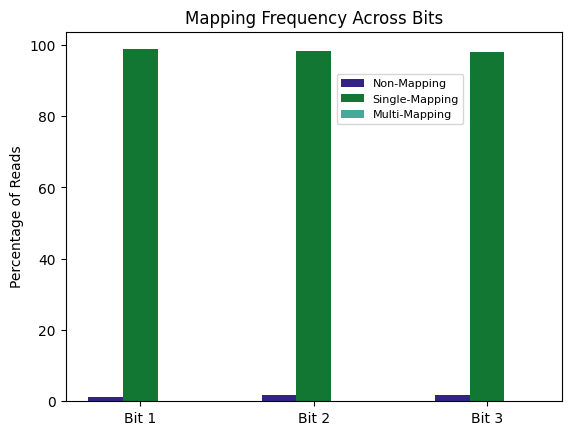

In [9]:
plt.bar(x-0.2, nonmapping, width, color='#332288') 
plt.bar(x, singlemapping, width, color='#117733') 
plt.bar(x+0.2, multimapping, width, color='#44AA99') 
plt.xticks(x, ['Bit 1', 'Bit 2', 'Bit 3',]) 
plt.ylabel("Percentage of Reads") 
plt.title('Mapping Frequency Across Bits')
plt.legend(["Non-Mapping", "Single-Mapping",'Multi-Mapping'],loc='upper right', bbox_to_anchor=(0.813, 0.9),
fontsize="8")
plt.savefig('../../figs/sfig1/mapping_frequency_barplot.svg', bbox_inches='tight', format='svg')
plt.show()